In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('financial_time_series_data.csv', parse_dates=['Date'])

                      Date         Open         High          Low  \
count                 2870  2870.000000  2870.000000  2870.000000   
mean   2015-07-03 02:24:00   149.833110   155.280822   144.408579   
min    2010-01-01 00:00:00   100.013469   101.101917    90.300817   
25%    2012-10-02 06:00:00   124.264593   129.602852   118.365574   
50%    2015-07-02 12:00:00   150.269971   155.804944   144.565375   
75%    2018-04-02 18:00:00   175.212467   180.292754   169.562928   
max    2020-12-31 00:00:00   199.971767   209.706402   198.531355   
std                    NaN    29.165289    29.329356    29.258302   

             Close       Volume  
count  2870.000000  2870.000000  
mean    149.828207  5452.942265  
min      95.981443  1001.419701  
25%     124.504697  3118.642716  
50%     149.701700  5369.779421  
75%     174.835052  7813.068316  
max     204.770822  9994.016105  
std      29.266910  2643.422073  


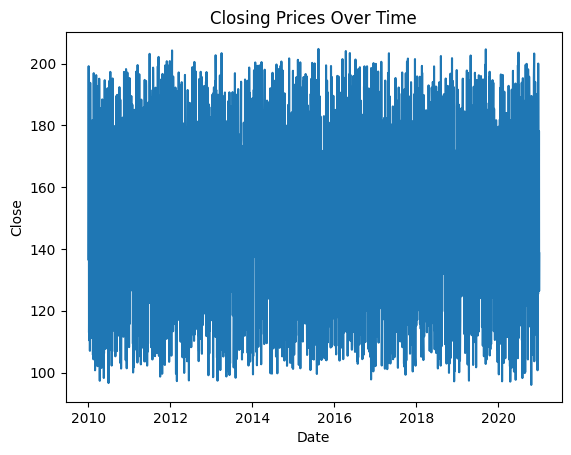

In [3]:
# EDA
print(data.describe())
sns.lineplot(x='Date', y='Close', data=data)
plt.title('Closing Prices Over Time')
plt.show()


In [4]:
# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Date']))

# Prepare data for time series forecasting
X = []
y = []
time_steps = 30  # Number of time steps to look back

for i in range(time_steps, len(data_scaled)):
    X.append(data_scaled[i-time_steps:i])
    y.append(data_scaled[i, 3])  # Predicting the closing price

X, y = np.array(X), np.array(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
57/57 [==============================] - 14s 90ms/step - loss: 0.0881 - mae: 0.2507 - val_loss: 0.0770 - val_mae: 0.2424
Epoch 2/50
57/57 [==============================] - 2s 37ms/step - loss: 0.0746 - mae: 0.2348 - val_loss: 0.0770 - val_mae: 0.2425
Epoch 3/50
57/57 [==============================] - 2s 27ms/step - loss: 0.0742 - mae: 0.2347 - val_loss: 0.0764 - val_mae: 0.2407
Epoch 4/50
57/57 [==============================] - 2s 27ms/step - loss: 0.0736 - mae: 0.2335 - val_loss: 0.0791 - val_mae: 0.2455
Epoch 5/50
57/57 [==============================] - 2s 38ms/step - loss: 0.0736 - mae: 0.2341 - val_loss: 0.0755 - val_mae: 0.2400
Epoch 6/50
57/57 [==============================] - 2s 28ms/step - loss: 0.0738 - mae: 0.2337 - val_loss: 0.0751 - val_mae: 0.2398
Epoch 7/50
57/57 [==============================] - 2s 28ms/step - loss: 0.0740 - mae: 0.2341 - val_loss: 0.0751 - val_mae: 0.2397
Epoch 8/50
57/57 [==============================] - 2s 39ms/step - loss: 0.0734 - 

In [6]:
# GRU
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
57/57 [==============================] - 7s 45ms/step - loss: 0.0875 - mae: 0.2489 - val_loss: 0.0796 - val_mae: 0.2453
Epoch 2/50
57/57 [==============================] - 2s 28ms/step - loss: 0.0757 - mae: 0.2362 - val_loss: 0.0761 - val_mae: 0.2406
Epoch 3/50
57/57 [==============================] - 2s 28ms/step - loss: 0.0747 - mae: 0.2352 - val_loss: 0.0759 - val_mae: 0.2403
Epoch 4/50
57/57 [==============================] - 2s 28ms/step - loss: 0.0739 - mae: 0.2336 - val_loss: 0.0754 - val_mae: 0.2403
Epoch 5/50
57/57 [==============================] - 2s 35ms/step - loss: 0.0745 - mae: 0.2346 - val_loss: 0.0752 - val_mae: 0.2401
Epoch 6/50
57/57 [==============================] - 3s 48ms/step - loss: 0.0751 - mae: 0.2359 - val_loss: 0.0762 - val_mae: 0.2406
Epoch 7/50
57/57 [==============================] - 2s 29ms/step - loss: 0.0734 - mae: 0.2333 - val_loss: 0.0762 - val_mae: 0.2405
Epoch 8/50
57/57 [==============================] - 2s 28ms/step - loss: 0.0737 - m

In [7]:
# Evaluate models
mse_lstm, mae_lstm = model_lstm.evaluate(X_test, y_test)
mse_gru, mae_gru = model_gru.evaluate(X_test, y_test)

print(f'LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}')
print(f'GRU - MSE: {mse_gru}, MAE: {mae_gru}')


18/18 [==============================] - 0s 7ms/step - loss: 0.0705 - mae: 0.2300
LSTM - MSE: 0.0720829963684082, MAE: 0.23314566910266876
GRU - MSE: 0.0705297663807869, MAE: 0.23001566529273987


In [8]:
# Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

18/18 [==============================] - 1s 7ms/step
